# An Overview of a regression assignment 
Attempting to fit Life Expectancy.


### 0. Imports

In [7]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")


### 1. Introducing the Life Expectancy dataset -- Exploratory Data Analysis (EDA)
##### The goal of this phase is to understand the different features and relations between them and w.r.t. the target feature

Loading the CSV dataset

In [8]:
dtf = pd.read_csv("./data/avocado.csv")

In [9]:
dtf.columns = dtf.columns.str.replace(' ', '')


In [10]:
dtf.head()

,Unnamed:0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:

dtf.describe()


,Unnamed:0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Examining the target feature - "Lifexpectancy": Using a histogram
Our main goal at this point is to examine the highest correlations (in absolute value - also taking into account strong negative correlations) between a feature and the target col (Life Expectancy).

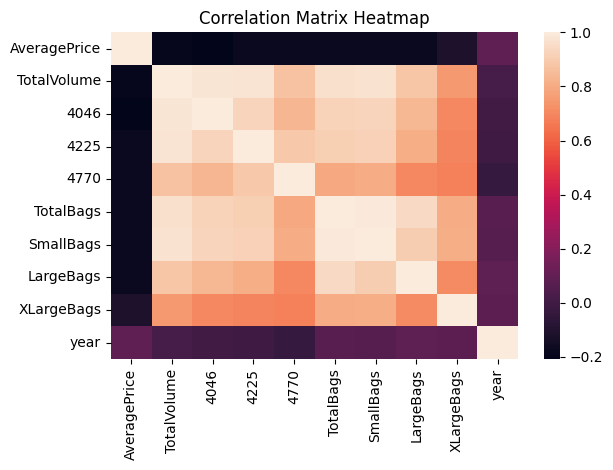

In [12]:
min_val_corr = 0.0

df_numeric = dtf.drop(columns=dtf.select_dtypes(include=['object']).columns).drop('Date', axis=1, errors= 'ignore')
target = 'AveragePrice'
# skip index column
corr_matrix = df_numeric.iloc[:, 1:].corr()
# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Plot heatmap
sns.heatmap(corr_matrix)     # Colorbar size
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()



The histogram above wel demonstrate that the features 'schooling' and'Income'  have high positive correlation with life expectancy. 
On the other hand 'AdultMortality' has strong negative correlation to the target feature.

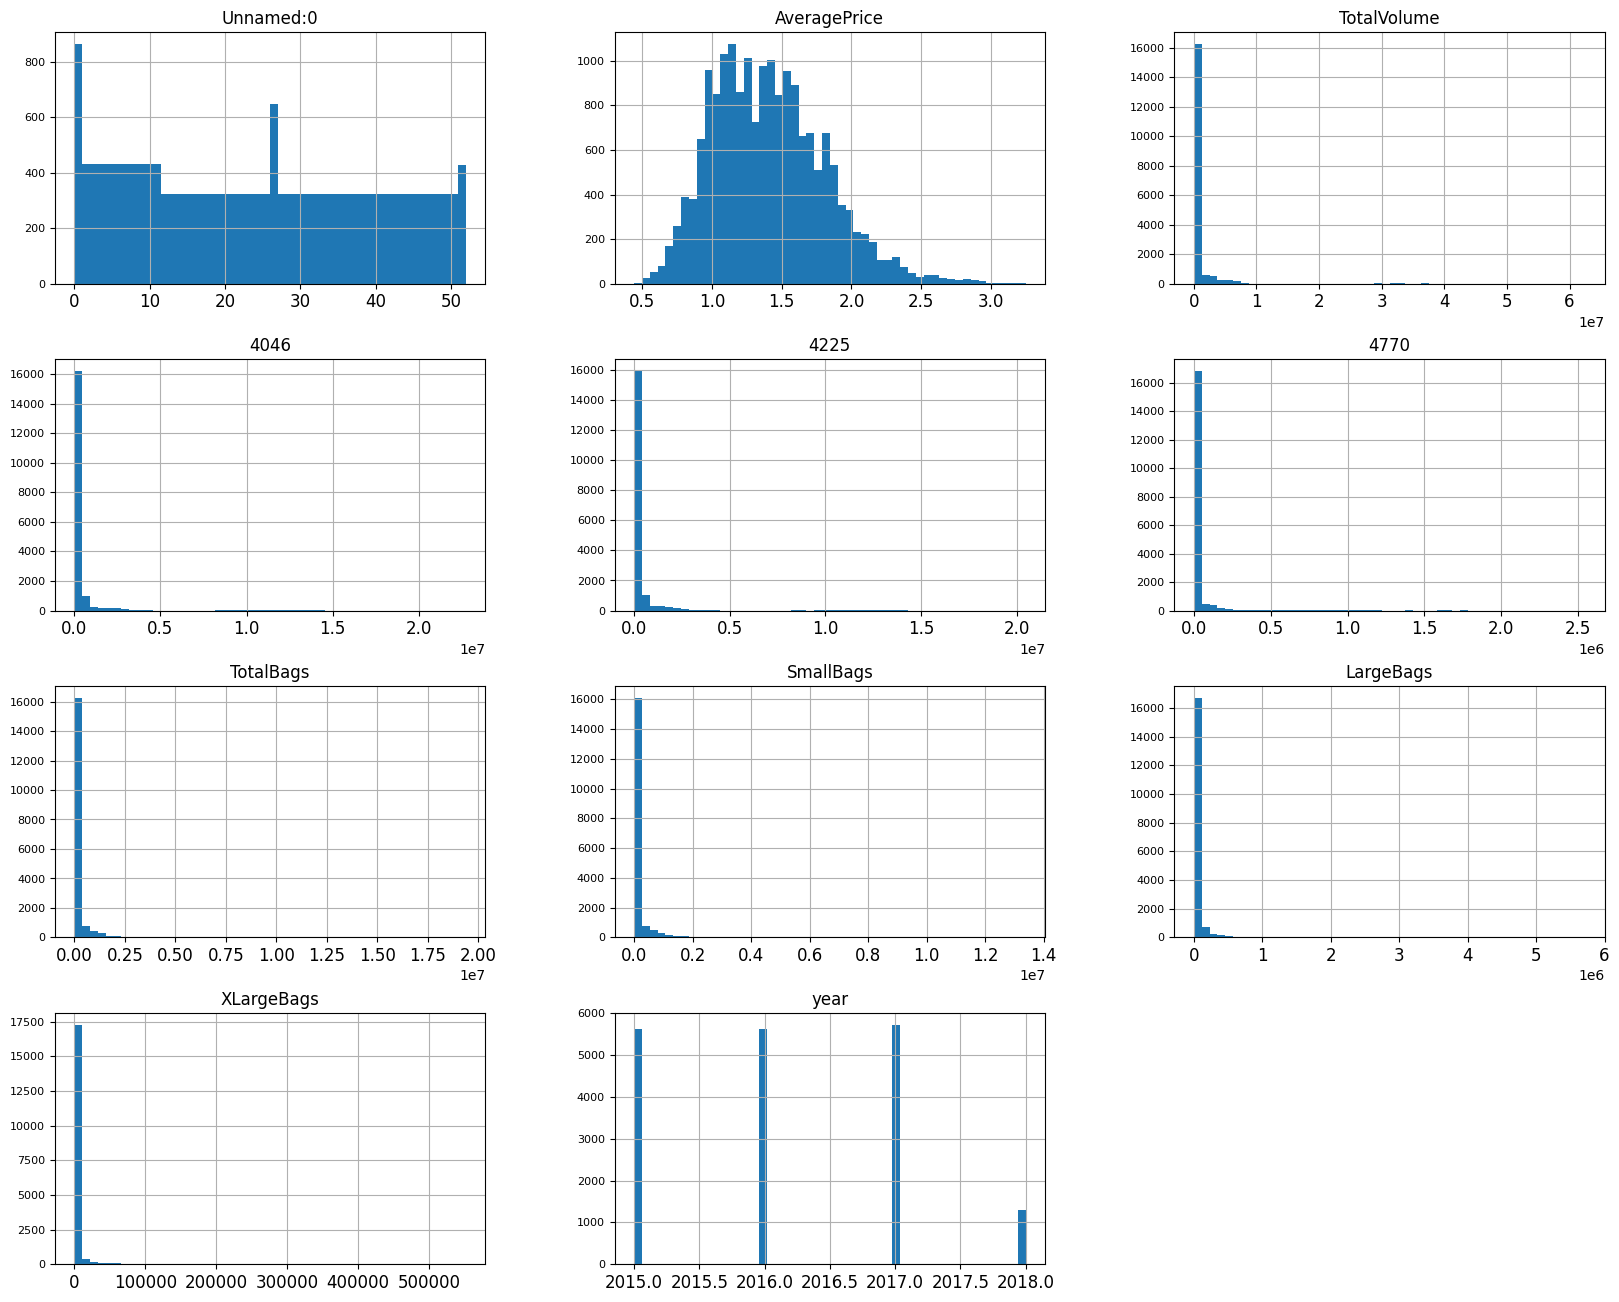

In [13]:
df_numeric.hist(figsize=(20, 16), bins=50, xlabelsize=12, ylabelsize=8)
plt.show()

The visualization above demonstrate a number of key points:
1. The distribution of thinnes 1-19 years is almost identical to theoe of thinnes 5-9 years. Thus we would drop the latter.
2. It seems like almost 50% of the IBM values in the dtaset are 50 and higher. Which is extremly high (According to BMI score calcuator), thus we'd probably drop that column, since its distribution in the dataset isn't realistic.
3. Life Expectancy's distribution is almost normal around 73-74.


### Now we'd like to take a deeper loook into the Lifeexpectancy column on our dataset with respect to the categorical 'Status' feature (Developed/Developing).

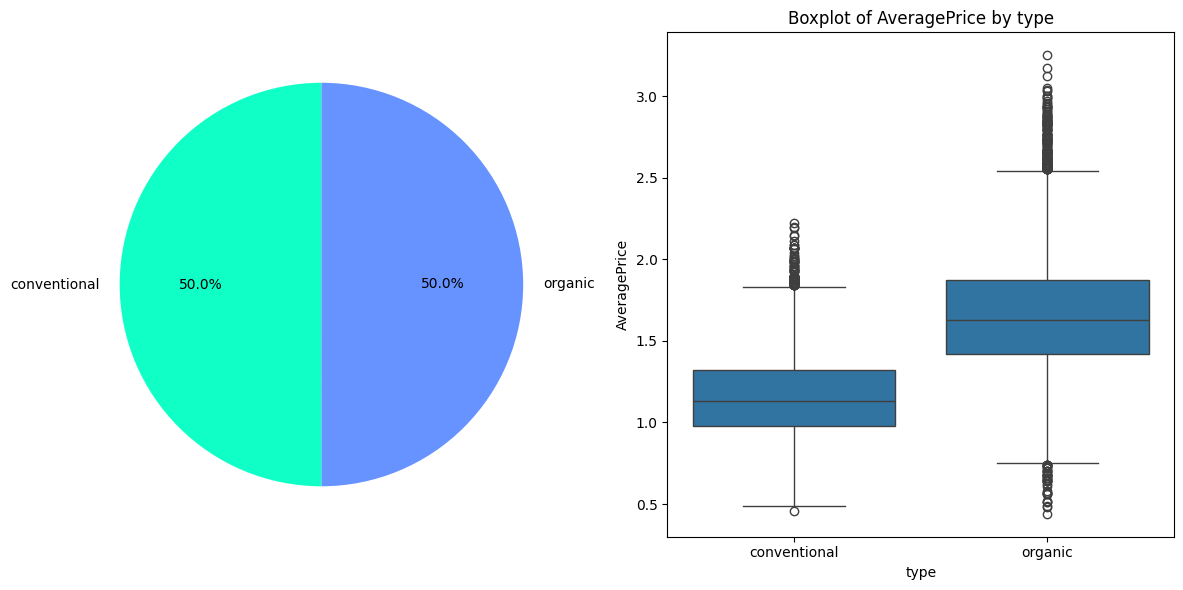

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
status_counts = dtf['type'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#0fffc7','#6693ff','#99ff99'])
sns.boxplot(x='type', y='AveragePrice', data=dtf.dropna(), ax = axes[1])
axes[1].set_title('Boxplot of AveragePrice by type')
dtf =  dtf.dropna()

plt.tight_layout()

# Show the plot
plt.show()


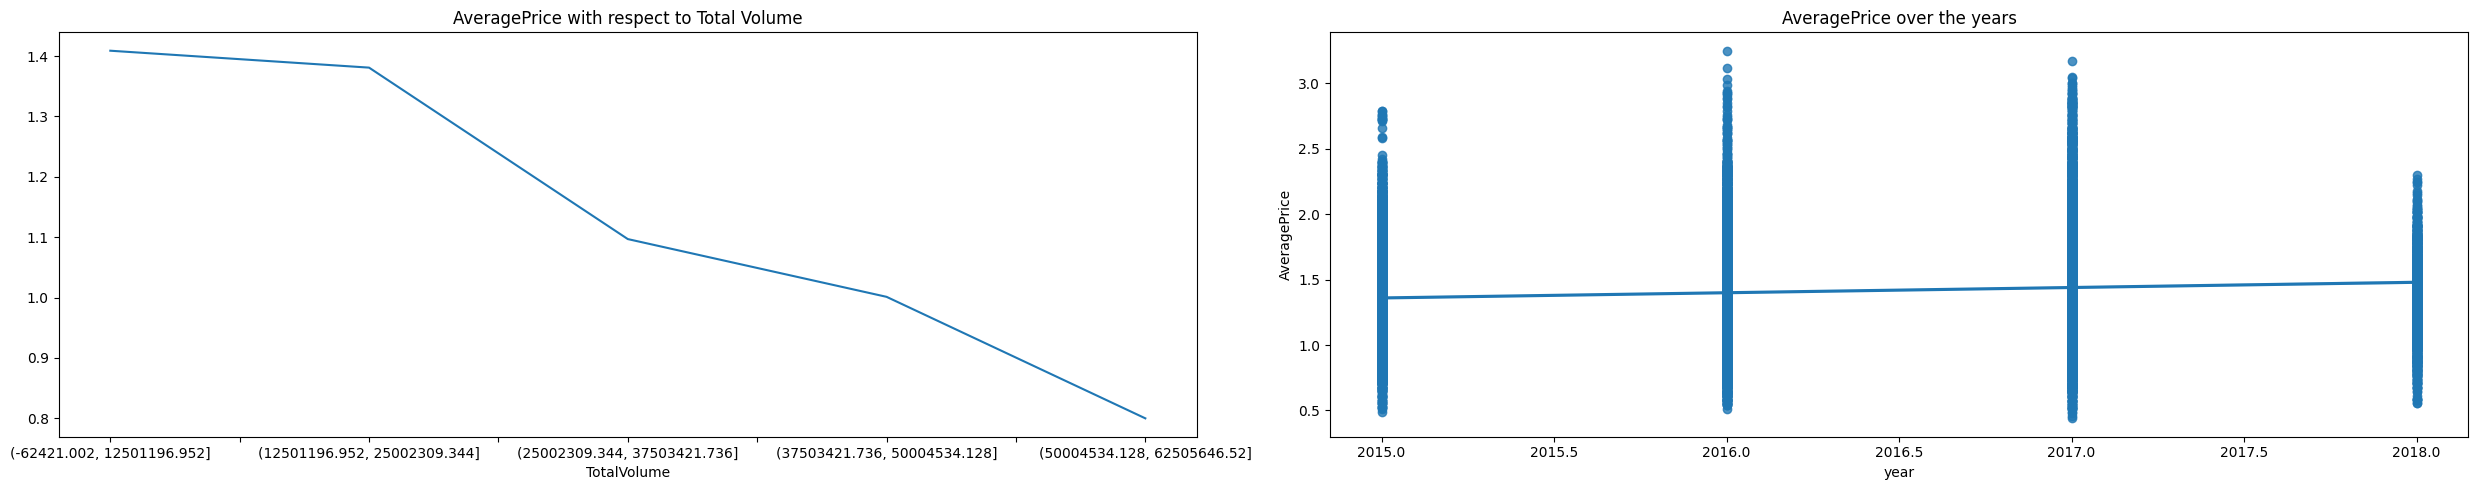

In [15]:
fig, axes = plt.subplots(1,2, figsize=(25, 5))

dtf.groupby(pd.cut(dtf['TotalVolume'],5))['AveragePrice'].mean().plot(kind='line',ax=axes[0])
#dtf.groupby(pd.cut(dtf['Incomecompositionofresources'],11))['Lifeexpectancy'].mean().plot(kind='line',ax=axes[1])
# Show the plot
axes[0].set_title("AveragePrice with respect to Total Volume")
axes[1].set_title("AveragePrice over the years")
sns.regplot(data=dtf,x='year',y='AveragePrice')
plt.tight_layout()
# Show the plot
plt.show()

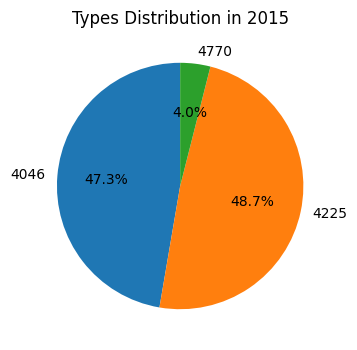

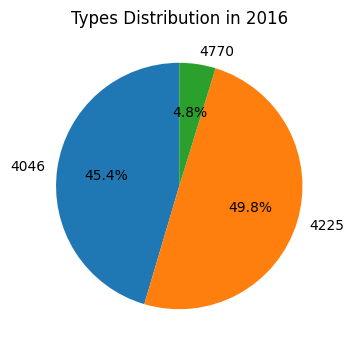

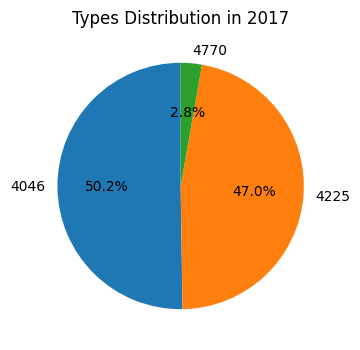

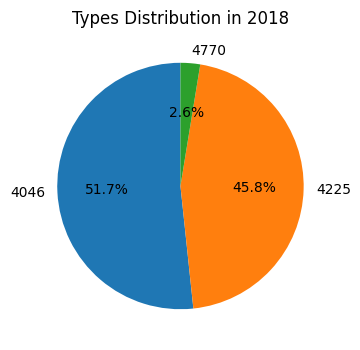

In [16]:
grouped = dtf.groupby("year")[["4046", "4225", "4770"]].sum()
for i, (year, totals) in enumerate(grouped.iterrows()):
    plt.figure(figsize=(7, 4))
    plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Types Distribution in {year}') 
    plt.show()

#### Examining Correlations to the target feature:

#### Visualzing relevant feature-pair relations:

While the plot above is difficult to read, we can bin the year column then group by and view the mean price

### 2 - Cleaning and Preprocessing

A. Split to Train and Test, then see the target feature distributions:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dtf['type'] = dtf['type'].map({'organic': 1, 'conventional': 0})
dtf = dtf.drop(columns=['Date'])
le = LabelEncoder()

# Apply label encoding to the 'region' column
dtf['region'] = le.fit_transform(dtf['region'])

In [18]:
dtf_train, dtf_test = train_test_split(dtf, 
                      test_size=0.25)

Concat the one-hot attributes and drop the original

In [19]:
from sklearn.preprocessing import OneHotEncoder
# convert categorical feature into one-hot encoding representation
#dummy_train = pd.get_dummies(dtf_train['type'], prefix='type')
#dummy_test = pd.get_dummies(dtf_test['type'], prefix='type')
# update test and train datasets with the new column of 'Status' Feature
#dtf_train = pd.concat([dtf_train, dummy_train], axis=1).drop(columns='type')
#dtf_test = pd.concat([dtf_test, dummy_test], axis=1).drop(columns='type')


### 3. Create a Baseline Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#separate X from y
X_train = dtf_train.drop('AveragePrice',axis=1)
X_test = dtf_test.drop('AveragePrice',axis=1)

y_train = dtf_train['AveragePrice']
y_test = dtf_test['AveragePrice']




#### Train a linear regression model

In [22]:
import xgboost as xgb
model = xgb.XGBRegressor()

In [23]:
prediction = model.fit(X_train,y_train).predict(X_test)

### 4. Evaluate how good is the model

Many metrics exist for evaluating the regression over the test data. 


In [24]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

In [25]:
r2_score(y_test, prediction)

0.9084266824405398

<br> What is a good R2 score and how do we improve it? This is not an ML class, a better question is what does the score "means"
<br>
High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted".
It *doesn't* directly imply whether the model is right!
<br>
Let's see more metrics:

In [26]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.3f}".format(mean_absolute_error(y_test, prediction)))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.3f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

## residuals
residuals = y_test - prediction
max_error = residuals.abs().max()
max_idx = residuals[residuals==max_error]
#max_true, max_pred = y_test.loc[max_idx], prediction[max_idx]
print("Max Error:", "{:,.3f}".format(max_error))



Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.065
Mean Absolute Error (Σ|y - pred|/n): 0.088
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 0.120
Max Error: 0.758


We now plot the true values against the predicted values. 
<br> In the regression line, the predicted values are always on the function y=x

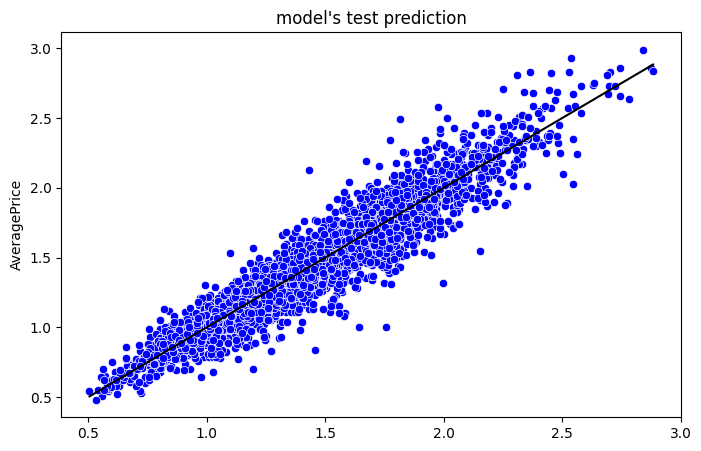

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x = prediction,y = y_test,ax=ax,color='blue')
sns.lineplot(x = prediction,y = prediction,ax=ax,color='black')
plt.title("model's test prediction")
plt.show()

### Currently it seems like the model performs rougly the same on items with high averagePrice and low averagePrice. But is it true though? Let's take a look at the resuduals:

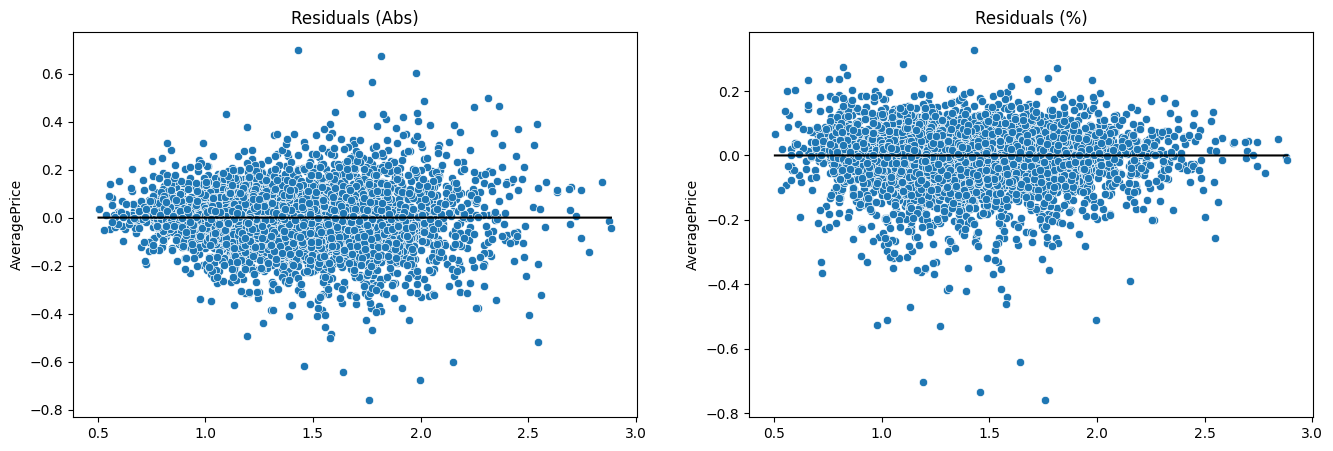

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=prediction,y=residuals,ax=ax[0])
sns.lineplot(x=prediction,y=0,ax=ax[0],color='black')
ax[0].set_title("Residuals (Abs)")
sns.scatterplot(x=prediction,y=residuals/y_test,ax=ax[1])
sns.lineplot(x=prediction,y=0,ax=ax[1],color='black')
ax[1].set_title("Residuals (%)")
plt.show()

Now we can tell that actually, in terms of precentages, the model perform worst on items with averagePrice of range 0.7-1.8. Meaning that the model tends to underestimate for items with low/medium averagePrice.

#Let's examine explanations for the model's tendency to underestimate for low averagePrices items#

<Figure size 1000x600 with 0 Axes>

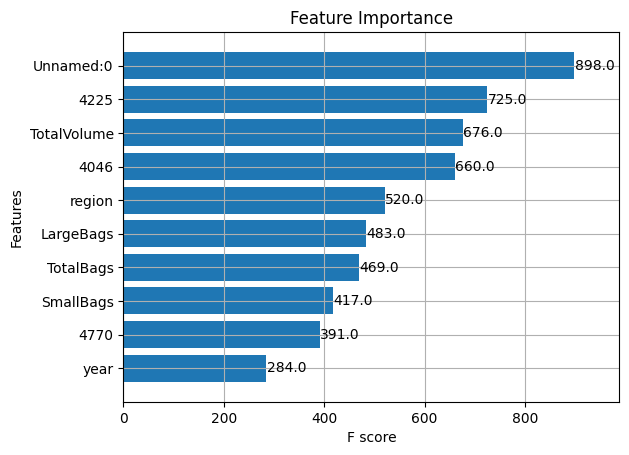

In [29]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance')
plt.show() 

Looking at the results of the model importance diagram, we can suggest some explenations to the underestimation:
1. We notice how little importence the model pays to the numver of avocados sold of type 4077. Moreover, we remmeber from the visualization part, that 

How many time did our model achieve low estimation error (error less than 5%)?:

How about more than 20%?

### 4. Model Explainability

We are first interested in feature importance.
<br>
In the simple linear regression model, we can look at the learned coefficients:

In [ ]:
#print("Model coefficients:\n")
#or i in range(len(X_train.columns)):
#  print(X_train.columns[i], "=", model.coef_[i].round(4))

However, since our features are not normalized, it is hard to assess which ones are the most important.
<br>
For that, we use SHAP

In [ ]:
import shap

In [ ]:
shap_sample = X_train.sample(500)

In [ ]:
explainer = shap.Explainer(model.predict, shap_sample)
shap_values = explainer(shap_sample)

In [ ]:
dtf.columns

In [ ]:
shap.plots.beeswarm(shap_values)

Remember that we can also do that to explain the prediction of a single element:

In [ ]:
test_shap_values = explainer(X_test)

What was our biggest relative error?

In [ ]:
rel_res[rel_res==rel_res.max()]


Our model predicted:

In [ ]:
max_id = rel_res[rel_res==rel_res.max()].index[0]
pred_series=pd.Series(prediction,index=rel_res.index)
pred_series[max_id]

And the real price was:

In [ ]:
y_test[max_id]

Let's look at this problematic point:

In [ ]:
X_test.loc[max_id]


In [ ]:
max_ordinal_id= X_test.index.get_loc(max_id)

In [ ]:
#sns.boxenplot(dtf.GrLivArea)

In [ ]:
shap.plots.waterfall(test_shap_values[max_ordinal_id])

In [ ]:
len(residuals[residuals>50000])

In [ ]:
bad_examples = X_test.loc[residuals[residuals>50000].index]
bad_examples_shap_values = explainer(bad_examples)
shap.plots.beeswarm(bad_examples_shap_values)

To get even a deeper understanding regarding our model's mistakes, we can compare the distributions of our mistakes to good predictions

In [ ]:
over_estimates = X_test.loc[residuals[residuals>50000].index]

In [ ]:
good_estimates = X_test.loc[rel_res[rel_res<0.05].index]

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
good_estimates.GrLivArea.hist(ax=ax,color='blue')
over_estimates.GrLivArea.hist(ax=ax,color='red')

We can see that our overestimas contains "larger" apartments.
<br> While the model correctly understood that larger apartments are often more expensive, this is not always correct! 

In [ ]:
len(good_estimates)

In [ ]:
len(over_estimates)